#### Importing necessary Libraries

In [2]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
from urllib.request import urlopen
from urllib.request import Request, urlopen
import requests

#### WebScraping using BeautifulSoup


<!DOCTYPE html>

<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>Coronavirus Update (Live): 7,356,857 Cases and 414,470 Deaths from COVID-19 Virus Pandemic - Worldometer</title>
<meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favico
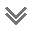

In [3]:
site= "https://www.worldometers.info/coronavirus"
hdr = {'User-Agent': 'Mozilla/5.0'}
req = Request(site,headers=hdr)
page = urlopen(req)
soup = BeautifulSoup(page,'html.parser')
print(soup)

In [4]:
soup = soup.find_all("table")
soup

[<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
 <thead>
 <tr>
 <th width="1%">#</th>
 <th width="100">Country,<br>Other</br></th>
 <th width="20">Total<br>Cases</br></th>
 <th width="30">New<br>Cases</br></th>
 <th width="30">Total<br>Deaths</br></th>
 <th width="30">New<br>Deaths</br></th>
 <th width="30">Total<br>Recovered</br></th>
 <th width="30">New<br>Recovered</br></th>
 <th width="30">Active<br/>Cases</th>
 <th width="30">Serious,<br/>Critical</th>
 <th width="30">Tot Cases/<br/>1M pop</th>
 <th width="30">Deaths/<br/>1M pop</th>
 <th width="30">Total<br/>Tests</th>
 <th width="30">Tests/<br/>
 <nobr>1M pop</nobr>
 </th>
 <th width="30">Population</th>
 <th style="display:none" width="30">Continent</th>
 <th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
 </tr>
 </thead>
 <tbody>
 <tr cla

In [5]:
table = soup
columns = []

for header in table:
    header_row = header.find_all('tr')
    
    for hr in header_row:
        headers = hr.find_all('th')
        #print(headers)
        
        if len(headers) > 1:
            for i in range(14):
                data = headers[i]
                columns.append(data.text.strip())
                
columns

['#',
 'Country,Other',
 'TotalCases',
 'NewCases',
 'TotalDeaths',
 'NewDeaths',
 'TotalRecovered',
 'NewRecovered',
 'ActiveCases',
 'Serious,Critical',
 'Tot\xa0Cases/1M pop',
 'Deaths/1M pop',
 'TotalTests',
 'Tests/\n1M pop',
 '#',
 'Country,Other',
 'TotalCases',
 'NewCases',
 'TotalDeaths',
 'NewDeaths',
 'TotalRecovered',
 'NewRecovered',
 'ActiveCases',
 'Serious,Critical',
 'Tot\xa0Cases/1M pop',
 'Deaths/1M pop',
 'TotalTests',
 'Tests/\n1M pop',
 '#',
 'Country,Other',
 'TotalCases',
 'NewCases',
 'TotalDeaths',
 'NewDeaths',
 'TotalRecovered',
 'NewRecovered',
 'ActiveCases',
 'Serious,Critical',
 'Tot\xa0Cases/1M pop',
 'Deaths/1M pop',
 'TotalTests',
 'Tests/\n1M pop']

In [6]:
tables = soup

country = []
total_cases = []
new_cases = []
total_deaths= []
new_deaths = []
total_recovered = []
new_recovered = []
active_cases = []
serious_critical = []
cases_1m =[]
deaths_1m=[]
total_tests = []
tests_1m=[]
population=[]

for table in tables:
    
    rows = table.find_all('tr')
    
    for r in rows:
        data = r.find_all('td')
        
        if len(data) > 1:
            
            d1 = data[1]
            country.append(d1.text.strip())
            
            d2 = data[2]
            total_cases.append(d2.text.strip())
             
            d3 = data[3]
            new_cases.append(d3.text.strip())
            
            d4 = data[4]
            total_deaths.append(d4.text.strip())
            
            d5 = data[5]
            new_deaths.append(d5.text.strip())
            
            d6 = data[6]
            total_recovered.append(d6.text.strip())
            
            d7 = data[7]
            new_recovered.append(d6.text.strip())
            
            d8 = data[8]
            active_cases.append(d8.text.strip())
            
            d9= data[9]
            serious_critical.append(d9.text.strip())
            
            d10= data[10]
            cases_1m.append(d10.text.strip())
            
            d11= data[11]
            deaths_1m.append(d11.text.strip())
            
            d12= data[12]
            total_tests.append(d12.text.strip())
            
            d13= data[13]
            tests_1m.append(d13.text.strip())
            
            d14= data[14]
            population.append(d14.text.strip())
    break 

#### Converting to Dataframe

In [13]:
df = pd.DataFrame({'Country': country, 'Total_cases': total_cases, 'New_cases': new_cases,'Total_deaths':total_deaths,'New_deaths': new_deaths,'Total_recovered':total_recovered, 'Active_cases': active_cases,'Serious_critical':serious_critical,'Cases/1M':cases_1m, 'Deaths/1M':deaths_1m,'Total tests':total_tests,'Tests/1M':tests_1m,'Population':population})
df.head(10)

,Country,Total_cases,New_cases,Total_deaths,New_deaths,Total_recovered,Active_cases,Serious_critical,Cases/1M,Deaths/1M,Total tests,Tests/1M,Population
0,North America,"2,334,502","+6,782","138,645",+706,"966,726","1,229,131","19,443",,,,,
1,South America,"1,219,723",+695,"52,857",+12,"564,277","602,589","11,932",,,,,
2,Europe,"2,136,663","+11,276","180,564",+380,"1,119,059","837,040","6,986",,,,,
3,Asia,"1,449,500","+25,230","36,684",+387,"877,604","535,212","15,092",,,,,
4,Africa,"206,861","+1,341","5,581",+13,"93,569","107,711",502,,,,,
5,Oceania,"8,887",+9,124,,"8,332",431,3,,,,,
6,,721,,15,,651,55,4,,,,,
7,World,"7,356,857","+45,333","414,470","+1,498","3,630,218","3,312,169","53,962",944,53.2,,,
8,USA,"2,047,147","+1,598","114,223",+75,"788,916","1,144,008","16,875","6,187",345,"22,164,494","66,984","330,891,117"
9,Brazil,"742,084",,"38,497",,"325,602","377,985","8,318","3,493",181,"999,836","4,706","212,471,616"


#### Continents dataframe

In [14]:
df_continents = df.iloc[:6,:8]
df_continents

,Country,Total_cases,New_cases,Total_deaths,New_deaths,Total_recovered,Active_cases,Serious_critical
0,North America,"2,334,502","+6,782","138,645",+706,"966,726","1,229,131","19,443"
1,South America,"1,219,723",+695,"52,857",+12,"564,277","602,589","11,932"
2,Europe,"2,136,663","+11,276","180,564",+380,"1,119,059","837,040","6,986"
3,Asia,"1,449,500","+25,230","36,684",+387,"877,604","535,212","15,092"
4,Africa,"206,861","+1,341","5,581",+13,"93,569","107,711",502
5,Oceania,"8,887",+9,124,,"8,332",431,3


#### Stripping '+' from columns:

In [15]:
df_continents['New_cases'] = df_continents['New_cases'].map(lambda x: x.lstrip('+'))
df_continents['New_deaths'] = df_continents['New_deaths'].map(lambda x: x.lstrip('+'))
#df_continents['Serious_critical'] = df_continents['Serious_critical'].map(lambda x: x.lstrip('+'))
df_continents

,Country,Total_cases,New_cases,Total_deaths,New_deaths,Total_recovered,Active_cases,Serious_critical
0,North America,"2,334,502","6,782","138,645",706,"966,726","1,229,131","19,443"
1,South America,"1,219,723",695,"52,857",12,"564,277","602,589","11,932"
2,Europe,"2,136,663","11,276","180,564",380,"1,119,059","837,040","6,986"
3,Asia,"1,449,500","25,230","36,684",387,"877,604","535,212","15,092"
4,Africa,"206,861","1,341","5,581",13,"93,569","107,711",502
5,Oceania,"8,887",9,124,,"8,332",431,3


#### Stripping Commas(,) from columns:

In [16]:
df_continents['Total_cases'] = df_continents['Total_cases'].map(lambda x: x.replace(',', ''))
df_continents['New_cases'] = df_continents['New_cases'].map(lambda x: x.replace(',', ''))
df_continents['Total_deaths'] = df_continents['Total_deaths'].map(lambda x: x.replace(',', ''))
df_continents['New_deaths'] = df_continents['New_deaths'].map(lambda x: x.replace(',', ''))
df_continents['Total_recovered'] = df_continents['Total_recovered'].map(lambda x: x.replace(',', ''))
df_continents['Active_cases'] = df_continents['Active_cases'].map(lambda x: x.replace(',', ''))
df_continents['Serious_critical'] = df_continents['Serious_critical'].map(lambda x: x.replace(',', ''))
df_continents

,Country,Total_cases,New_cases,Total_deaths,New_deaths,Total_recovered,Active_cases,Serious_critical
0,North America,2334502,6782,138645,706,966726,1229131,19443
1,South America,1219723,695,52857,12,564277,602589,11932
2,Europe,2136663,11276,180564,380,1119059,837040,6986
3,Asia,1449500,25230,36684,387,877604,535212,15092
4,Africa,206861,1341,5581,13,93569,107711,502
5,Oceania,8887,9,124,,8332,431,3


#### Replacing no values with Zero '0' :

In [17]:
df_continents.iloc[5,4] = '0'
df_continents

,Country,Total_cases,New_cases,Total_deaths,New_deaths,Total_recovered,Active_cases,Serious_critical
0,North America,2334502,6782,138645,706,966726,1229131,19443
1,South America,1219723,695,52857,12,564277,602589,11932
2,Europe,2136663,11276,180564,380,1119059,837040,6986
3,Asia,1449500,25230,36684,387,877604,535212,15092
4,Africa,206861,1341,5581,13,93569,107711,502
5,Oceania,8887,9,124,0,8332,431,3


In [19]:
df_continents.dtypes

Country             object
Total_cases         object
New_cases           object
Total_deaths        object
New_deaths          object
Total_recovered     object
Active_cases        object
Serious_critical    object
dtype: object

In [20]:
df_continents = df_continents.astype({'Country':object,'Total_cases': int,'New_cases':int,'New_deaths':int, 'Total_recovered':int,'Active_cases':int,'Serious_critical': int,'Total_deaths':int })

In [21]:
df_continents.to_csv('continents.csv', index=False)

#### Countries dataframe

In [104]:
df_countries = df.iloc[8:222,:]
df_countries.reset_index(inplace=True)
df_countries.drop('index',axis=1,inplace=True)
df_countries

/home/tarun/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Country,Total_cases,New_cases,Total_deaths,New_deaths,Total_recovered,Active_cases,Serious_critical,Cases/1M,Deaths/1M,Total tests,Tests/1M,Population
0,USA,"2,047,147","+1,598","114,223",+75,"788,916","1,144,008","16,875","6,187",345,"22,164,494","66,984","330,891,117"
1,Brazil,"742,084",,"38,497",,"325,602","377,985","8,318","3,493",181,"999,836","4,706","212,471,616"
2,Russia,"493,657","+8,404","6,358",+216,"252,783","234,516","2,300","3,383",44,"13,545,303","92,820","145,931,041"
3,UK,"289,140",,"40,883",,N/A,N/A,516,"4,260",602,"5,870,506","86,502","67,865,632"
4,Spain,"289,046",,"27,136",,N/A,N/A,617,"6,182",580,"4,465,338","95,508","46,753,788"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,Caribbean Netherlands,7,,,,7,0,,267,,424,"16,178","26,209"
210,St. Barth,6,,,,6,0,,608,,152,"15,392","9,875"
211,Lesotho,4,,,,2,2,,2,,"1,515",708,"2,141,255"
212,Anguilla,3,,,,3,0,,200,,41,"2,734","14,995"


#### Stripping '+' from columns:

In [105]:
df_countries['New_cases'] = df_countries['New_cases'].map(lambda x: x.lstrip('+'))
df_countries['New_deaths'] = df_countries['New_deaths'].map(lambda x: x.lstrip('+'))
df_countries.head(10)

/home/tarun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/tarun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Country,Total_cases,New_cases,Total_deaths,New_deaths,Total_recovered,Active_cases,Serious_critical,Cases/1M,Deaths/1M,Total tests,Tests/1M,Population
0,USA,"2,047,147","1,598","114,223",75,"788,916","1,144,008","16,875","6,187",345,"22,164,494","66,984","330,891,117"
1,Brazil,"742,084",,"38,497",,"325,602","377,985","8,318","3,493",181,"999,836","4,706","212,471,616"
2,Russia,"493,657","8,404","6,358",216,"252,783","234,516","2,300","3,383",44,"13,545,303","92,820","145,931,041"
3,UK,"289,140",,"40,883",,N/A,N/A,516,"4,260",602,"5,870,506","86,502","67,865,632"
4,Spain,"289,046",,"27,136",,N/A,N/A,617,"6,182",580,"4,465,338","95,508","46,753,788"
5,India,"276,583","1,803","7,745",26,"135,206","133,632","8,944",201,6,"5,061,332","3,670","1,379,196,659"
6,Italy,"235,561",,"34,043",,"168,646","32,872",263,"3,896",563,"4,318,650","71,422","60,466,601"
7,Peru,"203,736",,"5,738",,"92,929","105,069","1,077","6,184",174,"1,227,691","37,267","32,943,514"
8,Germany,"186,525",9,"8,831",,"170,700","6,994",533,"2,227",105,"4,348,880","51,915","83,768,916"
9,Iran,"177,938","2,011","8,506",81,"140,590","28,842","2,639","2,120",101,"1,128,601","13,447","83,927,262"


#### Stripping ',' from columns values:

In [106]:
df_countries['Total_cases'] = df_countries['Total_cases'].map(lambda x: x.replace(',', ''))
df_countries['New_cases'] = df_countries['New_cases'].map(lambda x: x.replace(',', ''))
df_countries['Total_deaths'] = df_countries['Total_deaths'].map(lambda x: x.replace(',', ''))
df_countries['New_deaths'] = df_countries['New_deaths'].map(lambda x: x.replace(',', ''))
df_countries['Total_recovered'] = df_countries['Total_recovered'].map(lambda x: x.replace(',', ''))
df_countries['Active_cases'] = df_countries['Active_cases'].map(lambda x: x.replace(',', ''))
df_countries['Serious_critical'] = df_countries['Serious_critical'].map(lambda x: x.replace(',', ''))
df_countries['Cases/1M'] = df_countries['Cases/1M'].map(lambda x: x.replace(',', ''))
df_countries['Deaths/1M'] = df_countries['Deaths/1M'].map(lambda x: x.replace(',', ''))
df_countries['Total tests'] = df_countries['Total tests'].map(lambda x: x.replace(',', ''))
df_countries['Tests/1M'] = df_countries['Tests/1M'].map(lambda x: x.replace(',', ''))
df_countries['Population'] = df_countries['Population'].map(lambda x: x.replace(',', ''))
df_countries

/home/tarun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/tarun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/tarun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

,Country,Total_cases,New_cases,Total_deaths,New_deaths,Total_recovered,Active_cases,Serious_critical,Cases/1M,Deaths/1M,Total tests,Tests/1M,Population
0,USA,2047147,1598,114223,75,788916,1144008,16875,6187,345,22164494,66984,330891117
1,Brazil,742084,,38497,,325602,377985,8318,3493,181,999836,4706,212471616
2,Russia,493657,8404,6358,216,252783,234516,2300,3383,44,13545303,92820,145931041
3,UK,289140,,40883,,N/A,N/A,516,4260,602,5870506,86502,67865632
4,Spain,289046,,27136,,N/A,N/A,617,6182,580,4465338,95508,46753788
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,Caribbean Netherlands,7,,,,7,0,,267,,424,16178,26209
210,St. Barth,6,,,,6,0,,608,,152,15392,9875
211,Lesotho,4,,,,2,2,,2,,1515,708,2141255
212,Anguilla,3,,,,3,0,,200,,41,2734,14995


#### Replacing empty values with null

In [107]:
df_countries.loc[df_countries['New_cases'] == '','New_cases'] = np.nan
df_countries.loc[df_countries['Total_deaths'] == '','Total_deaths'] = np.nan
df_countries.loc[df_countries['New_deaths'] == '','New_deaths'] = np.nan
df_countries.loc[df_countries['Total_recovered'] == 'N/A','Total_recovered'] = np.nan
df_countries.loc[df_countries['Active_cases'] == 'N/A','Active_cases'] = np.nan
df_countries.loc[df_countries['Serious_critical'] == '','Serious_critical'] = np.nan
df_countries.loc[df_countries['Cases/1M'] == '','Cases/1M'] = np.nan
df_countries.loc[df_countries['Deaths/1M'] == '','Deaths/1M'] = np.nan
df_countries.loc[df_countries['Total tests'] == '','Total tests'] = np.nan
df_countries.loc[df_countries['Tests/1M'] == '','Tests/1M'] = np.nan
df_countries.loc[df_countries['Population'] == '','Population'] = np.nan
df_countries

/home/tarun/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/home/tarun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/tarun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

,Country,Total_cases,New_cases,Total_deaths,New_deaths,Total_recovered,Active_cases,Serious_critical,Cases/1M,Deaths/1M,Total tests,Tests/1M,Population
0,USA,2047147,1598,114223,75,788916,1144008,16875,6187,345,22164494,66984,330891117
1,Brazil,742084,NaN,38497,NaN,325602,377985,8318,3493,181,999836,4706,212471616
2,Russia,493657,8404,6358,216,252783,234516,2300,3383,44,13545303,92820,145931041
3,UK,289140,NaN,40883,NaN,NaN,NaN,516,4260,602,5870506,86502,67865632
4,Spain,289046,NaN,27136,NaN,NaN,NaN,617,6182,580,4465338,95508,46753788
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,Caribbean Netherlands,7,NaN,NaN,NaN,7,0,NaN,267,NaN,424,16178,26209
210,St. Barth,6,NaN,NaN,NaN,6,0,NaN,608,NaN,152,15392,9875
211,Lesotho,4,NaN,NaN,NaN,2,2,NaN,2,NaN,1515,708,2141255
212,Anguilla,3,NaN,NaN,NaN,3,0,NaN,200,NaN,41,2734,14995


In [108]:
df_countries.dtypes

Country             object
Total_cases         object
New_cases           object
Total_deaths        object
New_deaths          object
Total_recovered     object
Active_cases        object
Serious_critical    object
Cases/1M            object
Deaths/1M           object
Total tests         object
Tests/1M            object
Population          object
dtype: object

In [114]:
df_countries.iloc[:,1:5] = df_countries.iloc[:,1:5].astype("Float64").astype("Int64")

/home/tarun/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/home/tarun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [115]:
df_countries.iloc[:,1:5]

,Total_cases,New_cases,Total_deaths,New_deaths
0,2047147,1598,114223,75
1,742084,<NA>,38497,<NA>
2,493657,8404,6358,216
3,289140,<NA>,40883,<NA>
4,289046,<NA>,27136,<NA>
...,...,...,...,...
209,7,<NA>,<NA>,<NA>
210,6,<NA>,<NA>,<NA>
211,4,<NA>,<NA>,<NA>
212,3,<NA>,<NA>,<NA>


#### Saving the dataframe to CSV 

In [118]:
df_countries.to_csv('countries.csv', index=False)